The article "prediction of Wine Quality Using Machine Learning" states that it used the red wine dataset. Paragraph 2.1 mentions that the dataset contains 4898 entries. When examing the datasets, this number corresponds to the white wine dataset. This confusion in consistent throughout the article. From this point on the white wine dataset will be used, eventhough the article states that the red wine dataset is used.

In [90]:
# used libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
print(tf.__version__)
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.layers import Dense, Input
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error
from scipy.stats import pearsonr
from keras.optimizers import Adam

2.17.0


In [91]:
#import the winequality dataset

# Define the relative path to the CSV file
relative_path = 'wine+quality/winequality-white.csv'
# Read the CSV file using pandas
wine_df = pd.read_csv(relative_path, delimiter=';')

features = wine_df.drop('quality', axis=1)
target = wine_df['quality']

len(features)


4898

Feature scaling was applied using standardization. Following code standardizes the dataset.

In [92]:
scaler = StandardScaler()

features_scaled = scaler.fit_transform(features)

feature_scaled_df = pd.DataFrame(features_scaled, columns=features.columns)
feature_scaled_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,0.172097,-0.081770,0.213280,2.821349,-0.035355,0.569932,0.744565,2.331512,-1.246921,-0.349184,-1.393152
1,-0.657501,0.215896,0.048001,-0.944765,0.147747,-1.253019,-0.149685,-0.009154,0.740029,0.001342,-0.824276
2,1.475751,0.017452,0.543838,0.100282,0.193523,-0.312141,-0.973336,0.358665,0.475102,-0.436816,-0.336667
3,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
4,0.409125,-0.478657,-0.117278,0.415768,0.559727,0.687541,1.121091,0.525855,0.011480,-0.787342,-0.499203
...,...,...,...,...,...,...,...,...,...,...,...
4893,-0.776015,-0.677101,-0.365197,-0.944765,-0.310008,-0.664970,-1.091000,-0.965483,0.541334,0.088973,0.557282
4894,-0.301959,0.414339,0.213280,0.317179,0.056196,1.275590,0.697499,0.291789,-0.253446,-0.261553,-0.743008
4895,-0.420473,-0.379435,-1.191592,-1.023637,-0.218457,-0.312141,-0.643875,-0.497350,-1.313153,-0.261553,-0.905544
4896,-1.605613,0.116674,-0.282557,-1.043355,-1.088192,-0.900190,-0.667408,-1.784717,1.004955,-0.962605,1.857572


Create the train, validation and test set from the original data set

In [93]:
# Step 1: Split the data into training and temporary sets
# The training set will contain 60% of the data, and the temporary set will contain 40% of the data
features_train, features_temp, target_train, target_temp = train_test_split(features_scaled, target, test_size=0.4, random_state=1)

# Step 1: Split the data into training and temporary sets
# The training set will contain 60% of the data, and the temporary set will contain 40% of the data
features_test, features_validate, target_test, target_validate = train_test_split(features_temp, target_temp, test_size=0.5, random_state=1)

# Now, features_train and target_train contain the training data (60% of the original data)
# features_test and target_test contain the testing data (20% of the original data)
# features_validate and target_validate contain the validation data (20% of the original data)


Create a ANN model with:
- 1 input layer with 11 neurons
- 3 hidden layers with 15 neurons
- 1 output layer with 1 neuron

In [94]:
# Initialize the Sequential model
model = tf.keras.Sequential()
# model = Sequential()

#add layers
model.add(Input(shape=(11,))) # input layer
model.add(Dense(15, activation='relu')) # first hidden layer
model.add(Dense(15, activation='relu')) # second hidden layer
model.add(Dense(15, activation='relu')) # third hidden layer
model.add(Dense(1, activation='linear')) # Output layer

# Compile the model with mean squared error loss and Adam optimizer
# Also include mean squared error, mean absolute error, and mean absolute percentage error as metrics
model.compile(loss='mse', optimizer='adam', metrics=['mean_squared_error', 'mean_absolute_error', 'mean_absolute_percentage_error'])

# Print the summary of the model architecture
model.summary()

Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_28 (Dense)                │ (None, 15)             │           180 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_29 (Dense)                │ (None, 15)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_30 (Dense)                │ (None, 15)             │           240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            16 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 676 (2.64 KB)

 Trainable params: 676 (2.64 KB)

 Non-trainable params: 0 (0.00 B)

In [95]:
# Train the model with the training data
# - epochs: Number of times the model will iterate over the entire training dataset
# - batch_size: Number of samples per gradient update
# - validation_data: Data on which to evaluate the loss and metrics at the end of each epoch
# - verbose: Verbosity mode (1 = progress bar)
history = model.fit(features_train, target_train, epochs=50, batch_size=32, validation_data=(features_validate, target_validate), verbose=1)


Epoch 1/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 22.9193 - mean_absolute_error: 4.5421 - mean_absolute_percentage_error: 76.6375 - mean_squared_error: 22.9193 - val_loss: 4.8564 - val_mean_absolute_error: 1.6807 - val_mean_absolute_percentage_error: 29.0885 - val_mean_squared_error: 4.8564
Epoch 2/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 3.5418 - mean_absolute_error: 1.4696 - mean_absolute_percentage_error: 25.4013 - mean_squared_error: 3.5418 - val_loss: 2.5546 - val_mean_absolute_error: 1.2277 - val_mean_absolute_percentage_error: 21.1919 - val_mean_squared_error: 2.5546
Epoch 3/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 2.5529 - mean_absolute_error: 1.2160 - mean_absolute_percentage_error: 21.1260 - mean_squared_error: 2.5529 - val_loss: 1.8322 - val_mean_absolute_error: 1.0601 - val_mean_absolute_percentage_error: 18.3085 - val_mean_squared_error: 1.8322
Epoch 4/50
92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 1.6966 - mean_absolute_error: 1.0009 - mean_ab

In [96]:
# Evaluate the model on the test data
test_loss = model.evaluate(features_test, target_test, verbose=1)

# Print the test loss
print("Test loss:", test_loss)

# Make predictions on the test data
predictions = model.predict(features_test)



31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.5613 - mean_absolute_error: 0.5833 - mean_absolute_percentage_error: 9.8697 - mean_squared_error: 0.5613
Test loss: [0.568958044052124, 0.568958044052124, 0.5842009782791138, 9.888849258422852]
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


In [97]:
# Function to calculate metrics (R, MSE, MAPE)
def calculate_metrics(y_true, y_pred):
    # Calculate R (Pearson correlation coefficient)
    r, _ = pearsonr(y_true, y_pred)

    # Calculate MSE
    mse = mean_squared_error(y_true, y_pred)

    # Calculate MAPE
    mape = mean_absolute_percentage_error(y_true, y_pred)

    return r, mse, mape

In [98]:
# Make predictions on the training and test data
train_predictions = model.predict(features_train)
test_predictions = model.predict(features_test)

92/92 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


In [99]:
# Convert to 1D numpy array
train_predictions = train_predictions.flatten()
test_predictions = test_predictions.flatten()

In [100]:
# Calculate metrics for training data set
train_r, train_mse, train_mape = calculate_metrics(target_train, train_predictions)

# # Calculate metrics for testing data set
test_r, test_mse, test_mape = calculate_metrics(target_test, test_predictions)

/home/abroer/miniconda3/envs/IM0712-Assignment3/lib/python3.12/site-packages/shap/explainers/_deep/deep_tf.py:99: UserWarning: Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.
  warnings.warn("Your TensorFlow version is newer than 2.4.0 and so graph support has been removed in eager mode and some static graphs may not be supported. See PR #1483 for discussion.")
/home/abroer/miniconda3/envs/IM0712-Assignment3/lib/python3.12/site-packages/keras/src/models/functional.py:225: UserWarning: The structure of `inputs` doesn't match the expected structure: keras_tensor_77. Received: the structure of inputs=['*']
  warnings.warn(


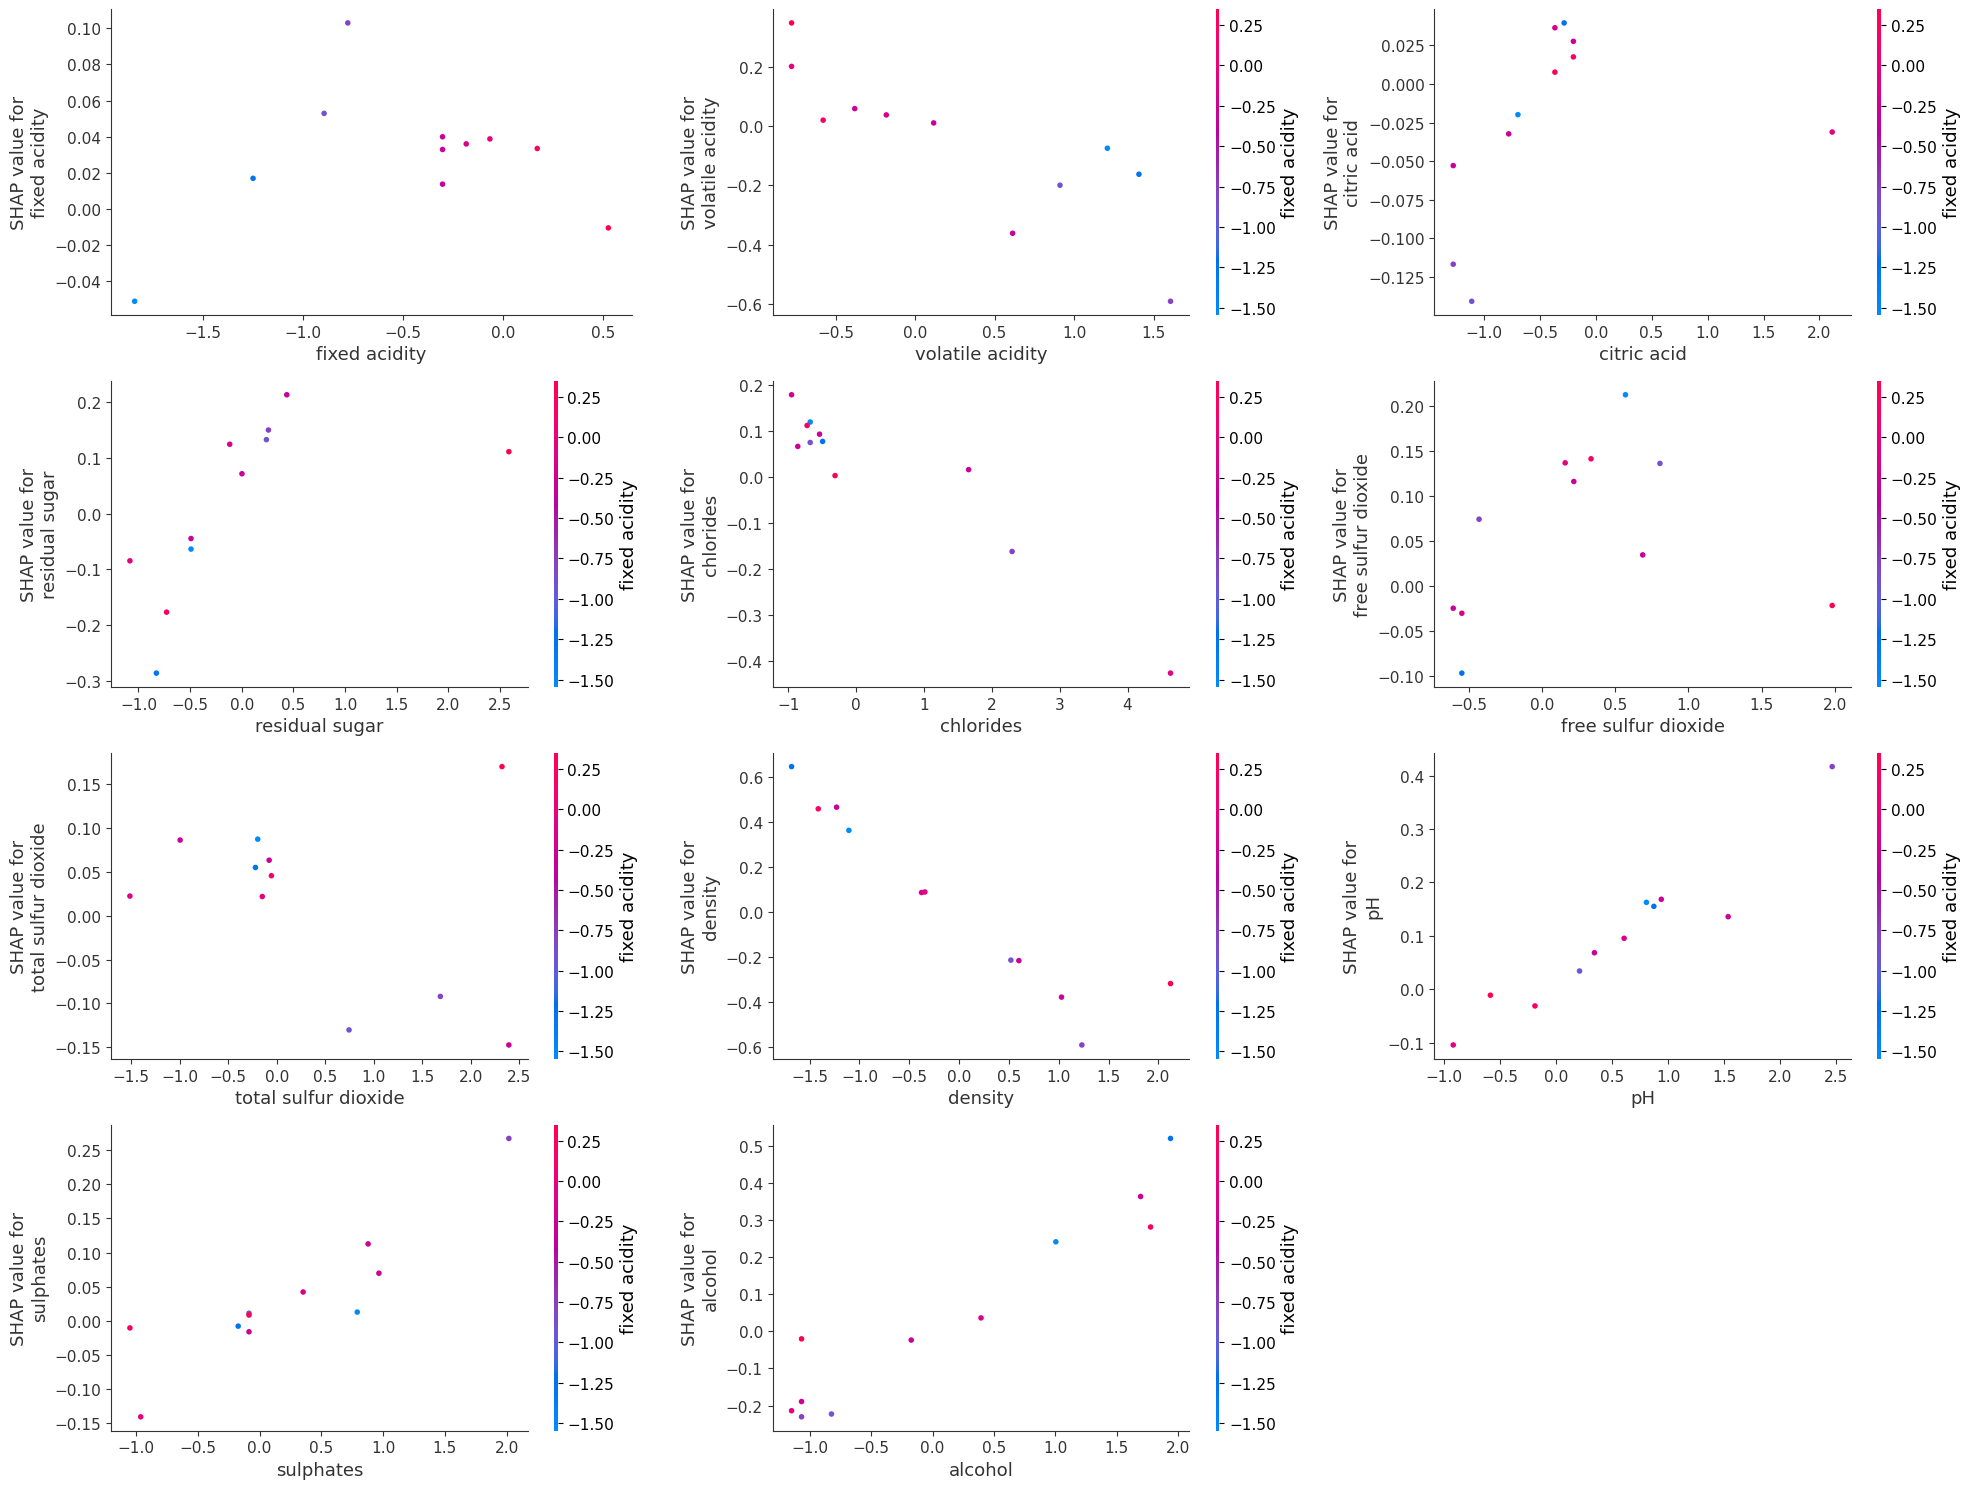

In [121]:
import shap

background_data = features_train  # Use a subset of the training data for background
test_data = features_test[:11]

explainer = shap.DeepExplainer(model, background_data)
shap_values = explainer.shap_values(test_data)
fig, ax = plt.subplots(4, 3, figsize=(20, 15))
ax = ax.flatten()

for i in range(11):
    shap.dependence_plot(i, shap_values, test_data, feature_names=features.columns, ax=ax[i], show=False)

# Remove any unused subplots
for j in range(11, len(ax)):
    fig.delaxes(ax[j])

plt.tight_layout()
plt.show()
#shap.dependence_plot(2, shap_values, test_data, feature_names=features.columns)
#shap.summary_plot(shap_values, test_data, feature_names=features.columns)